This notebook plots the molecules along the x-axis and the mz's along the y-axis

In [1]:
import pandas as pd
import numpy as np

from IPython.display import display

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# User-defined modules
import os, sys
src_dir = os.path.normpath('../util')
sys.path.insert(0, src_dir)
import util

In [3]:
# Read in the csv data
fname = '../../data/clean/metabolites_and_spectra.csv'
all_mtabs = util.unpackCSV(fname)

In [11]:
for k in all_mtabs:
    if len(all_mtabs[k].MS2) > 1:
        break
all_mtabs[k].MS2[1].peaks

[(136.87, 34.965),
 (180.91, 26.628),
 (198.46, 8.3),
 (198.87, 45.266),
 (254.86, 100.0)]

In [13]:
peaks = all_mtabs[k].MS2[1].peaks
[[i[0], i[1]] for i in peaks]

[[136.87, 34.965],
 [180.91, 26.628],
 [198.46, 8.3],
 [198.87, 45.266],
 [254.86, 100.0]]

Pseudo-code:

- make tidy data so I can plot:
   - x = molecule ID   
   - y = mz   
   - size = intensity   
   - color = chemical class   

In [41]:
# Make tidy dataframe with [inchi, hmdb_id, all-taxonomy-levels, ms2_id, npeaks, ionization]
taxa_cols = ['kingdom', 'super_class', 'sub_class', 'class', 'molecular_framework']
empty_tax_dict = {i: '' for i in taxa_cols}
dflst = []
for m in all_mtabs:
    mtab = all_mtabs[m]
    n_ms2 = len(mtab.MS2)
    if n_ms2 > 0:
        hmdb_id = mtab.accession
        
        # Get taxonomy info, or if it doesn't have any make it empty
        taxonomy = mtab.taxonomy_dict
        if taxonomy is None:
            taxonomy = empty_tax_dict

        # Set up the molecule metadata
        m_lst = [m, hmdb_id] + [taxonomy[t] for t in taxa_cols]
        
        # Get all of the MS2 peaks
        for i in range(n_ms2):
            peaks = mtab.MS2[i].peaks
            
            if peaks is not None:
                npeaks = len(peaks)
                # Assemble list of [mlcl_metadata, ms2_scan, peak1, int1]
                dflst += [m_lst + [i, npeaks, p[0], p[1], mtab.MS2[i].ionization_mode] for p in peaks]
        

In [45]:
cols = ['inchi', 'hmdb'] + taxa_cols + ['ms2_scan', 'num_peaks', 'mz', 'intensity', 'ion_mode']
peaksdf = pd.DataFrame(dflst, columns=cols)
peaksdf.head(15)

,inchi,hmdb,kingdom,super_class,sub_class,class,molecular_framework,ms2_scan,num_peaks,mz,intensity,ion_mode
0,ZQSIJRDFPHDXIC-UHFFFAOYSA-N,HMDB0003312,Organic compounds,Phenylpropanoids and polyketides,Isoflav-2-enes,Isoflavonoids;,Aromatic heteropolycyclic compounds,0,1,254.889000,100.000000,Positive
1,ZQSIJRDFPHDXIC-UHFFFAOYSA-N,HMDB0003312,Organic compounds,Phenylpropanoids and polyketides,Isoflav-2-enes,Isoflavonoids;,Aromatic heteropolycyclic compounds,1,5,136.870000,34.965000,Positive
2,ZQSIJRDFPHDXIC-UHFFFAOYSA-N,HMDB0003312,Organic compounds,Phenylpropanoids and polyketides,Isoflav-2-enes,Isoflavonoids;,Aromatic heteropolycyclic compounds,1,5,180.910000,26.628000,Positive
3,ZQSIJRDFPHDXIC-UHFFFAOYSA-N,HMDB0003312,Organic compounds,Phenylpropanoids and polyketides,Isoflav-2-enes,Isoflavonoids;,Aromatic heteropolycyclic compounds,1,5,198.460000,8.300000,Positive
4,ZQSIJRDFPHDXIC-UHFFFAOYSA-N,HMDB0003312,Organic compounds,Phenylpropanoids and polyketides,Isoflav-2-enes,Isoflavonoids;,Aromatic heteropolycyclic compounds,1,5,198.870000,45.266000,Positive
5,ZQSIJRDFPHDXIC-UHFFFAOYSA-N,HMDB0003312,Organic compounds,Phenylpropanoids and polyketides,Isoflav-2-enes,Isoflavonoids;,Aromatic heteropolycyclic compounds,1,5,254.860000,100.000000,Positive
6,ZQSIJRDFPHDXIC-UHFFFAOYSA-N,HMDB0003312,Organic compounds,Phenylpropanoids and polyketides,Isoflav-2-enes,Isoflavonoids;,Aromatic heteropolycyclic compounds,2,4,65.060000,39.174000,Positive
7,ZQSIJRDFPHDXIC-UHFFFAOYSA-N,HMDB0003312,Organic compounds,Phenylpropanoids and polyketides,Isoflav-2-enes,Isoflavonoids;,Aromatic heteropolycyclic compounds,2,4,90.990000,100.000000,Positive
8,ZQSIJRDFPHDXIC-UHFFFAOYSA-N,HMDB0003312,Organic compounds,Phenylpropanoids and polyketides,Isoflav-2-enes,Isoflavonoids;,Aromatic heteropolycyclic compounds,2,4,136.860000,13.277000,Positive
9,ZQSIJRDFPHDXIC-UHFFFAOYSA-N,HMDB0003312,Organic compounds,Phenylpropanoids and polyketides,Isoflav-2-enes,Isoflavonoids;,Aromatic heteropolycyclic compounds,2,4,152.410000,8.384000,Positive


In [94]:
# The seaborn plot takes forever, might be a smarter way to plot it?
# GOal: make x and color columns in dataframe

# First, re-order the molecules according to their taxonomy
peaksdf = peaksdf.sort_values(by=taxa_cols)

# Label each unique inchi with the same x value (i.e. overlap multiple MS2s from same inchi)
inchis = peaksdf['inchi'].unique()
inch2x = {inchis[i]: i for i in range(len(inchis))}
peaksdf['x'] = peaksdf['inchi'].apply(lambda x: inch2x[x])

# Give each sub class a color
labels = peaksdf['sub_class'].unique()
palette = sns.color_palette('husl', n_colors=len(labels))
lab2color = {labels[i]: palette[i] for i in range(len(labels))}
peaksdf['color'] = peaksdf['sub_class'].apply(lambda x: lab2color[x])

In [95]:
# Keep the largest classes for plotting
keep_classes = peaksdf[['inchi', 'sub_class']]\
    .drop_duplicates()\
    .groupby('sub_class')\
    .size()\
    .sort_values(ascending=False)\
    .reset_index()
keep_classes.columns = ['sub_class', 'n_molecules']
keep_classes = keep_classes.query('n_molecules > 10')
keep_classes = keep_classes['sub_class'].tolist()

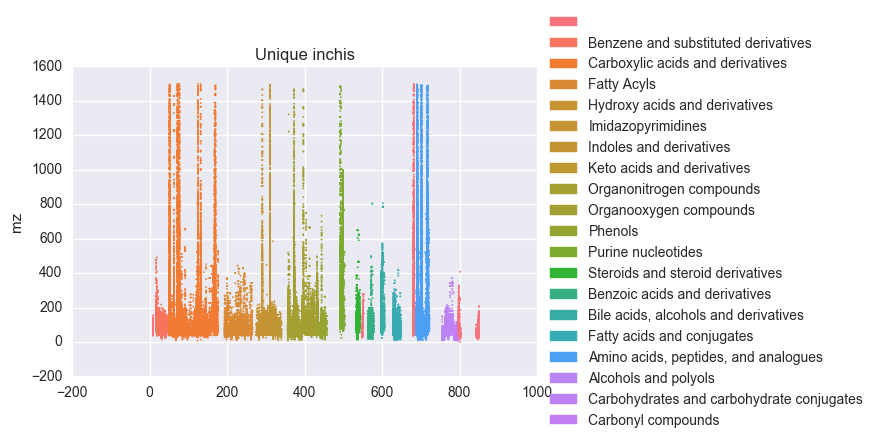

In [102]:
# Just plot the compounds in classes with at least 10 molecules
toplot = peaksdf.query('sub_class == @keep_classes')
plt.scatter(toplot['x'], toplot['mz'], color=toplot['color'], s=1)
lgd_handles = [mpatches.Patch(color=lab2color[k], label=k) for k in toplot['sub_class'].unique()]
plt.legend(handles=lgd_handles, loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('mz')
plt.title('Unique inchis')


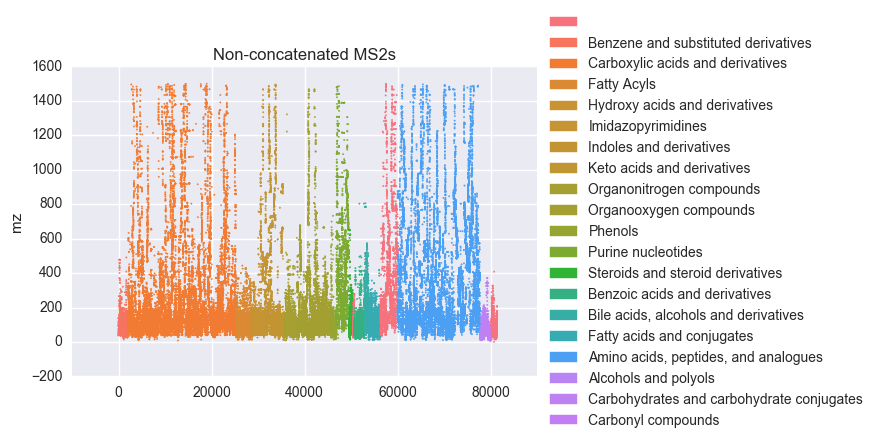

In [104]:
# Just plot the compounds in classes with at least 10 molecules
# What if I don't merge multiple MS2's from same molecule?
toplot = peaksdf.query('sub_class == @keep_classes')
plt.scatter(range(len(toplot['x'])), toplot['mz'], color=toplot['color'], s=1)

lgd_handles = [mpatches.Patch(color=lab2color[k], label=k) for k in toplot['sub_class'].unique()]
plt.legend(handles=lgd_handles, loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('mz')
plt.title('Non-concatenated MS2s')

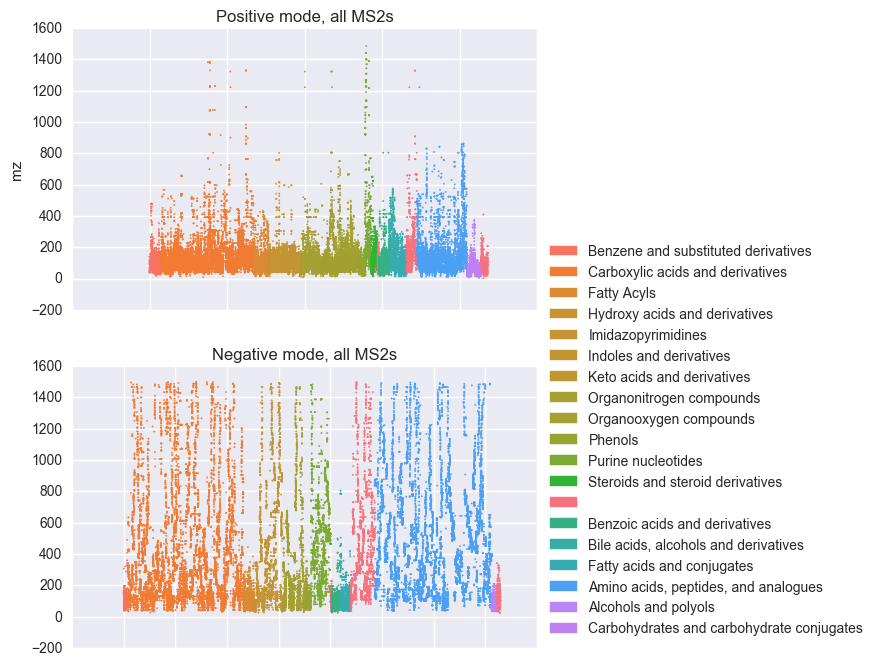

In [114]:
# Stratify by ionization mode?
fig, ax = plt.subplots(2, 1, figsize=(6, 8))

toplot = peaksdf.query('sub_class == @keep_classes').query('ion_mode == "Positive"')
ax[0].scatter(range(len(toplot['x'])), toplot['mz'], color=toplot['color'], s=1)
ax[0].set_title('Positive mode, all MS2s')
ax[0].set_xticklabels('')

toplot = peaksdf.query('sub_class == @keep_classes').query('ion_mode == "Negative"')
ax[1].scatter(range(len(toplot['x'])), toplot['mz'], color=toplot['color'], s=1)
ax[1].set_title('Negative mode, all MS2s')
ax[1].set_xticklabels('')

lgd_handles = [mpatches.Patch(color=lab2color[k], label=k) for k in toplot['sub_class'].unique()]
ax[1].legend(handles=lgd_handles, loc='lower left', bbox_to_anchor=(1, 0))

ax[0].set_ylabel("mz")

Hm, this may be a difficult classification problem based on mz's alone... Definitely excited to do the topic modeling!

Also, maybe binning will help?